<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/main/Copy_of_JPMC_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Exploratory Data Analysis
# Import basic libraries
import numpy as np 
import pandas as pd 
# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
pd.set_option('max_columns',None)
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print("\n Numpy: " + np.__version__)
print("\n sklearn: " + sklearn.__version__)

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late


 Numpy: 1.22.4

 sklearn: 1.2.1


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/healthcare-dataset-stroke-data.csv?raw=true")
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Getting Meta Data Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Pull descriptive statistics from your overall dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [ ]:
# Checking for Null Values 
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Gender (0 = Female; 1 = Male, 2 = Other).  --- just a note for me so I don't forget

In [ ]:
# Preprocessing - go through all cat cols and validate against the data dictionary
print('Gender ' + str(sorted(df['gender'].unique())))

Gender ['Female', 'Male', 'Other']


In [ ]:
fill = (df.gender == 'Female')
df.loc[fill, 'gender'] = 0

In [ ]:
fill = (df.gender == 'Male')
df.loc[fill, 'gender'] = 1

In [ ]:
fill = (df.gender == 'Other')
df.loc[fill, 'gender'] = 2

In [ ]:
df['gender'].value_counts()

0    2994
1    2115
2       1
Name: gender, dtype: int64

In [ ]:
# AGE is not Cat...It is Num
print('AGE ' + str(sorted(df['age'].unique())))

AGE [0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.72, 0.8, 0.88, 1.0, 1.08, 1.16, 1.24, 1.32, 1.4, 1.48, 1.56, 1.64, 1.72, 1.8, 1.88, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0]


In [ ]:
# HyperTension (0 = No Hypertension; 1 = Yes Hypertension).

print('HyperTension ' + str(sorted(df['hypertension'].unique())))

HyperTension [0, 1]


In [ ]:
# heart_disease (0 = No heart_disease; 1 = Yes heart_disease).
print('heart_disease ' + str(sorted(df['heart_disease'].unique())))

heart_disease [0, 1]


In [ ]:
# Ever Married  0: Not Married, 1: Married
print('ever_married' + str(sorted(df['ever_married'].unique())))

ever_married['No', 'Yes']


In [ ]:
fill = (df.ever_married == 'No')
df.loc[fill, 'ever_married'] = 0

In [ ]:
fill = (df.ever_married == 'Yes')
df.loc[fill, 'ever_married'] = 1

In [ ]:
# Work Type: 0: Never_worked, 1: Children, 2: Govt_job ,  3:Self-employed , 4 : Private, 
print('work_type ' + str(sorted(df['work_type'].unique())))

work_type ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']


In [ ]:
fill = (df.work_type == 'Never_worked')
df.loc[fill, 'work_type'] = 0
fill = (df.work_type == 'children')
df.loc[fill, 'work_type'] = 1
fill = (df.work_type == 'Govt_job')
df.loc[fill, 'work_type'] = 2
fill = (df.work_type == 'Self-employed')
df.loc[fill, 'work_type'] = 3
fill = (df.work_type == 'Private')
df.loc[fill, 'work_type'] = 4

In [ ]:
# Residence Type  0: Rural, 1: Urban
print('Residence_type ' + str(sorted(df['Residence_type'].unique())))

Residence_type [0, 1]


In [ ]:
fill = (df.Residence_type == 'Rural')
df.loc[fill, 'Residence_type'] = 0
fill = (df.Residence_type == 'Urban')
df.loc[fill, 'Residence_type'] = 1

In [ ]:
print('avg_glucose_level ' + str(sorted(df['avg_glucose_level'].unique())))

avg_glucose_level [55.12, 55.22, 55.23, 55.25, 55.26, 55.27, 55.28, 55.32, 55.34, 55.35, 55.39, 55.41, 55.42, 55.46, 55.47, 55.51, 55.57, 55.58, 55.59, 55.61, 55.62, 55.64, 55.67, 55.72, 55.78, 55.79, 55.83, 55.84, 55.86, 55.93, 55.96, 56.07, 56.08, 56.11, 56.12, 56.13, 56.18, 56.21, 56.23, 56.3, 56.31, 56.32, 56.33, 56.34, 56.37, 56.42, 56.43, 56.47, 56.48, 56.51, 56.63, 56.64, 56.67, 56.71, 56.74, 56.75, 56.77, 56.79, 56.84, 56.85, 56.87, 56.89, 56.9, 56.94, 56.95, 56.96, 56.99, 57.02, 57.06, 57.08, 57.09, 57.1, 57.15, 57.17, 57.26, 57.27, 57.28, 57.3, 57.33, 57.37, 57.38, 57.4, 57.42, 57.43, 57.46, 57.47, 57.51, 57.52, 57.56, 57.57, 57.59, 57.6, 57.76, 57.77, 57.79, 57.8, 57.82, 57.83, 57.89, 57.92, 57.93, 57.94, 57.95, 57.96, 58.01, 58.02, 58.03, 58.09, 58.14, 58.19, 58.23, 58.24, 58.25, 58.26, 58.29, 58.3, 58.35, 58.37, 58.38, 58.39, 58.41, 58.42, 58.47, 58.48, 58.51, 58.55, 58.57, 58.63, 58.64, 58.65, 58.66, 58.69, 58.7, 58.71, 58.72, 58.81, 58.86, 58.87, 58.88, 58.89, 58.95, 58.

In [ ]:
print('BMI ' + str(sorted(df['bmi'].unique())))

BMI [10.3, 19.4, 36.6, nan, 11.3, 11.5, 12.0, 12.3, 12.8, 13.0, 13.2, 13.3, 13.4, 13.5, 13.7, 13.8, 13.9, 14.0, 14.1, 14.2, 14.3, 14.4, 14.5, 14.6, 14.8, 14.9, 15.0, 15.1, 15.2, 15.3, 15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17.0, 17.1, 17.2, 17.3, 17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18.8, 18.9, 19.0, 19.1, 19.2, 19.3, 19.5, 19.6, 19.7, 19.8, 19.9, 20.0, 20.1, 20.2, 20.3, 20.4, 20.5, 20.6, 20.7, 20.8, 20.9, 21.0, 21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22.0, 22.1, 22.2, 22.3, 22.4, 22.5, 22.6, 22.7, 22.8, 22.9, 23.0, 23.1, 23.2, 23.3, 23.4, 23.5, 23.6, 23.7, 23.8, 23.9, 24.0, 24.1, 24.2, 24.3, 24.4, 24.5, 24.6, 24.7, 24.8, 24.9, 25.0, 25.1, 25.2, 25.3, 25.4, 25.5, 25.6, 25.7, 25.8, 25.9, 26.0, 26.1, 26.2, 26.3, 26.4, 26.5, 26.6, 26.7, 26.8, 26.9, 27.0, 27.1, 27.2, 27.3, 27.4, 27.5, 27.6, 27.7, 27.8, 27.9, 28.0, 28.1, 28.2, 28.3, 28.4, 28.5, 28.6, 28.7, 28.8, 28.9, 29.0, 

In [ ]:
# Smoking Status  0:Unknown, 1: Never Smoked, 2: Formerly Smoked, 3: Smokes
print('Smoking Status ' + str(sorted(df['smoking_status'].unique())))

Smoking Status ['Unknown', 'formerly smoked', 'never smoked', 'smokes']


In [ ]:
fill = (df.smoking_status == 'Unknown')
df.loc[fill, 'smoking_status'] = 0
fill = (df.smoking_status == 'never smoked')
df.loc[fill, 'smoking_status'] = 1
fill = (df.smoking_status == 'formerly smoked')
df.loc[fill, 'smoking_status'] = 2
fill = (df.smoking_status == 'smokes')
df.loc[fill, 'smoking_status'] = 3

In [ ]:
print('Stroke ' + str(sorted(df['stroke'].unique())))

Stroke [0, 1]


<AxesSubplot:xlabel='stroke', ylabel='count'>

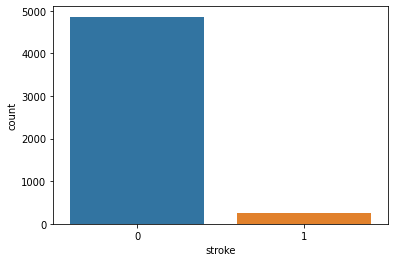

In [ ]:
# Univariate Analysis - Analyze 1 variable at a time
# This analysis is restricted to cat cols ... 
# Think about this... when you did a "describe" - you were analyzing the numeric cols... one at a time
sns.countplot(x="stroke", data=df)

In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
6636 / (23364 + 6636)

0.2212

In [ ]:
df['stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

<AxesSubplot:xlabel='gender', ylabel='count'>

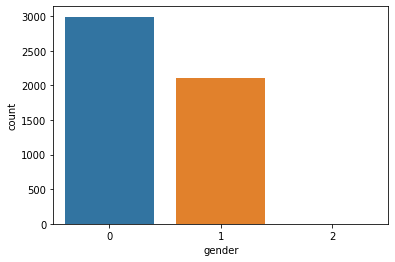

In [ ]:
sns.countplot(x="gender", data=df)

In [ ]:
df['gender'].value_counts()

0    2994
1    2115
2       1
Name: gender, dtype: int64

In [ ]:
df['gender'].value_counts(normalize=True)

0    0.585910
1    0.413894
2    0.000196
Name: gender, dtype: float64

<AxesSubplot:xlabel='hypertension', ylabel='count'>

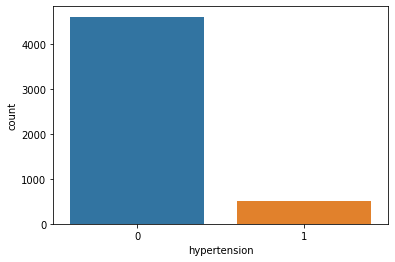

In [ ]:
sns.countplot(x="hypertension", data=df)

In [ ]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [ ]:
df['hypertension'].value_counts(normalize=True)

0    0.902544
1    0.097456
Name: hypertension, dtype: float64

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

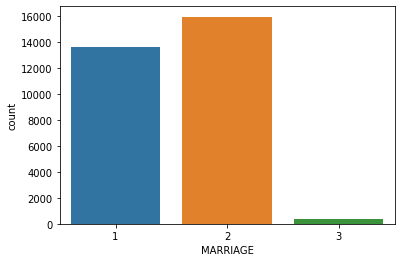

In [ ]:
sns.countplot(x="MARRIAGE", data=df)

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

0    0.945988
1    0.054012
Name: heart_disease, dtype: float64

0    4834
1     276
Name: heart_disease, dtype: int64

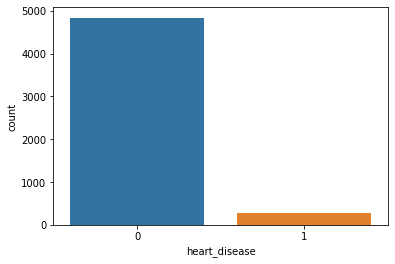

In [ ]:
 sns.countplot(x="heart_disease", data=df)
 df['heart_disease'].value_counts(normalize=True)
 df['heart_disease'].value_counts()



<AxesSubplot:xlabel='ever_married', ylabel='count'>

1    0.656164
0    0.343836
Name: ever_married, dtype: float64

1    3353
0    1757
Name: ever_married, dtype: int64

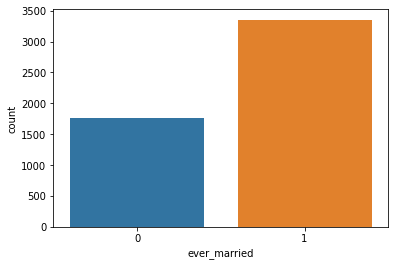

In [ ]:
sns.countplot(x="ever_married", data=df)

df['ever_married'].value_counts()
 
 

In [ ]:
df['ever_married'].value_counts(normalize=True)

1    0.656164
0    0.343836
Name: ever_married, dtype: float64

<AxesSubplot:xlabel='work_type', ylabel='count'>

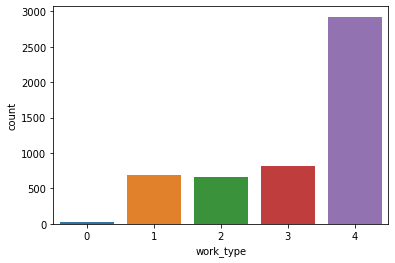

In [ ]:
sns.countplot(x="work_type", data=df)

In [ ]:
df['work_type'].value_counts(normalize=True)

4    0.572407
3    0.160274
1    0.134442
2    0.128571
0    0.004305
Name: work_type, dtype: float64

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

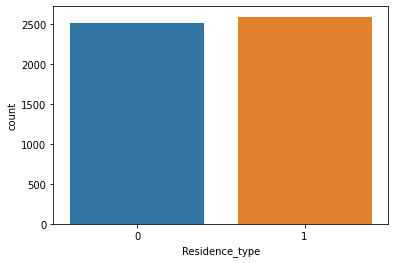

In [ ]:
sns.countplot(x="Residence_type", data=df)

In [ ]:
df['Residence_type'].value_counts(normalize=True)

1    0.508023
0    0.491977
Name: Residence_type, dtype: float64

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

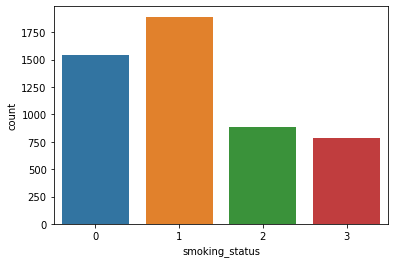

In [ ]:
sns.countplot(x="smoking_status", data=df)

In [ ]:
df['smoking_status'].value_counts(normalize=True)

1    0.370254
0    0.302153
2    0.173190
3    0.154403
Name: smoking_status, dtype: float64

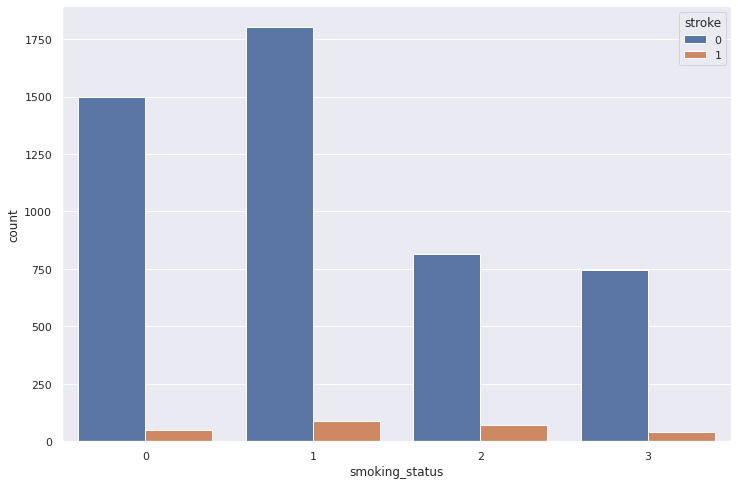

In [ ]:
# Bivariate Analysis
sns.set(rc={'figure.figsize':(12,8)})
edu = sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.show()

In [ ]:
pd.crosstab(df.smoking_status,df.stroke,margins=True)

stroke,0,1,All
smoking_status,,,
0,1497,47,1544
1,1802,90,1892
2,815,70,885
3,747,42,789
All,4861,249,5110


In [ ]:
pd.crosstab(df.hypertension,df.stroke,normalize='index',margins=True)

stroke,0,1
hypertension,,
0,0.960321,0.039679
1,0.867470,0.132530
All,0.951272,0.048728


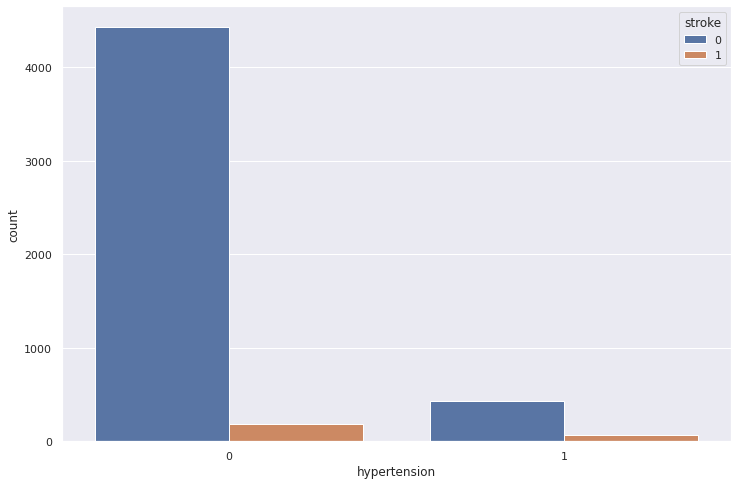

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
edu = sns.countplot(x='hypertension', hue='stroke', data=df)
plt.show()

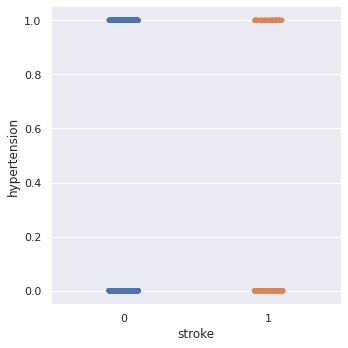

In [ ]:
sns.catplot(x="stroke", y="hypertension", jitter=True, data=df);

In [ ]:
pd.crosstab(df.bmi,df.stroke)

stroke,0,1
bmi,,
10.3,1,0
11.3,1,0
11.5,1,0
12.0,1,0
12.3,1,0
...,...,...
66.8,1,0
71.9,1,0
78.0,1,0


In [ ]:
pd.crosstab(df.hypertension,df.stroke,normalize='index',margins=True)

stroke,0,1
hypertension,,
0,0.960321,0.039679
1,0.867470,0.132530
All,0.951272,0.048728


In [ ]:
# Correlation
sns.set(rc={'figure.figsize':(30,10)})
sns.set_context("talk", font_scale=0.7)

<AxesSubplot:>

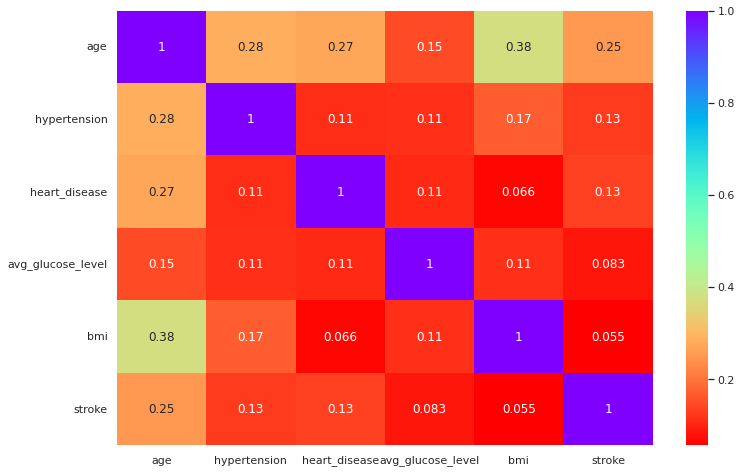

In [ ]:
sns.heatmap(df.iloc[:,1:].corr(method='spearman'), cmap='rainbow_r', annot=True)